## HOUSE DATA PRICE

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Chargement des données

In [ ]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

Paramètres de visualisation pour jupyter

In [ ]:
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 100

## Exploration des données

In [4]:
# enregistrer l'index et 
train_id = train['Id']
test_id = test['Id']

# suppression de l'Id
train.drop(columns ='Id', axis=1, inplace=True)
test.drop(columns ='Id', axis=1, inplace=True)

# sauvegarde du nombre de ligne du train et du test
n_train = train.shape[0]
n_test = test.shape[0]

# mettre le SalePrice le target dans une variable a part
y_train = train.SalePrice

# suppression de la colonne SalePrice
train.drop(['SalePrice'], axis=1, inplace=True)

In [5]:
#concatenation des data train et test
df_inter = pd.concat((train, test)).reset_index(drop=True)

## Gestion des données manquantes
Visualisation des données manquantes

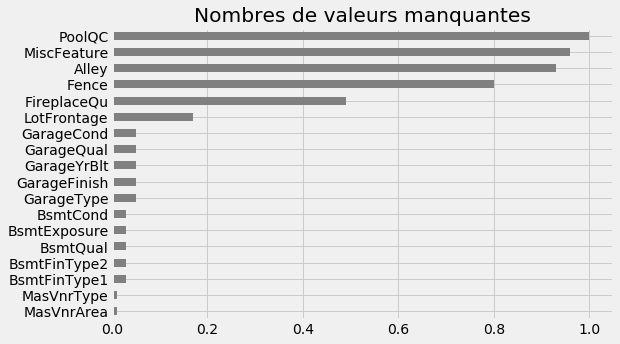

In [ ]:
total_na = round((df_inter.isna().sum().sort_values())/df_inter.shape[0], 2)

col_miss_values = (total_na[total_na > 0]).index

total_na[col_miss_values].plot(kind='barh',color='grey',figsize=(8,5),title="Nombres de valeurs manquantes")

On décide de supprimer les colonnes contenant plus de 15% de valeurs manquantes

In [12]:
cols_low_na = total_na[total_na < 0.15]
df_inter = df_inter[cols_low_na.index]

In [14]:
#round((df_inter.isna().sum().sort_values(ascending=False))/df_inter.shape[0], 2)

## Gestion des valeurs manquantes
- Que faire du GarageYrBlt ?
- Bsmt => Vérifier qu'il  n'y a pas de basement

### Question 1
Les variables restantes sont-elles corrélées à notre prédiction ? -> Visualisation boxplot pour les qualitatives et scatterplot pour les quantitatives ( --> matrice de corrélation )<br>
### Question 2
Est-ce que des variables nous apporte la même information ? -> Visualisation plot de corrélation ( --> matrice de corrélation )

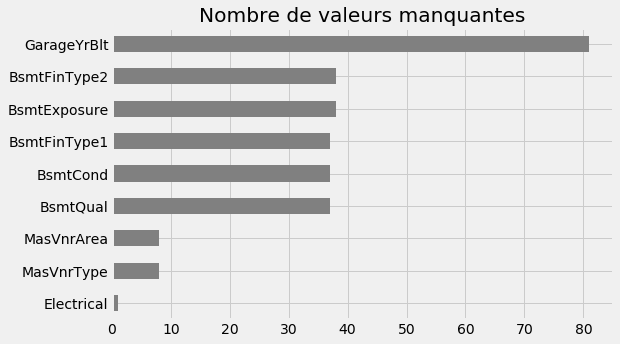

In [ ]:
total_na = df_inter.isna().sum().sort_values()
total_na[total_na > 0].plot(kind='barh',color='grey',figsize=(8,5),title="Nombre de valeurs manquantes")

### ( A CONFIRMER )
Le nombre de valeurs manquantes sont les mêmes pour les variables *Garage_*. Le manque d'informations provient de l'inexistence du Garage.
<br><br>
On décide de remplacer les n/a qualitatifs par un label "N/A"

In [37]:
# cols_replace_na_cat = ["GarageCond","GarageType","GarageFinish","GarageQual"]
# df_train[cols_replace_na_cat] = df_train[cols_replace_na_cat].fillna('N/A')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [16]:
cols_replace_na_cat = ["GarageCond","GarageType","GarageFinish","GarageQual"]
for i in cols_replace_na_cat:
    df_inter[i].fillna('N/A', inplace=True)

In [21]:
cols_replace_na_num =['GarageCars','GarageYrBlt','MasVnrArea','GarageArea']
for i in cols_replace_na_num:
    df_inter[i].fillna(0, inplace=True)

## Reconstitution de la data

In [24]:
train_clean = df_inter[:n_train]
test_clean = df_inter[n_train:]

train_clean = pd.concat((train_clean, y_train), axis=1).reset_index(drop=True)

## Séléction de features
Visualisations des corrélations

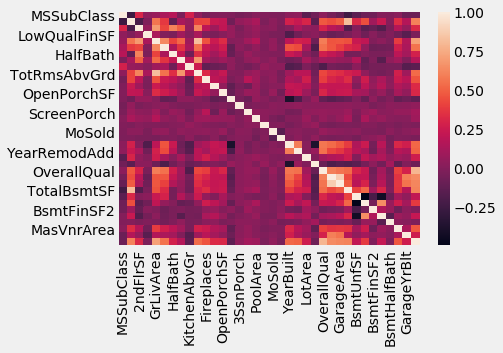

In [ ]:
sns.heatmap(train_clean.corr())

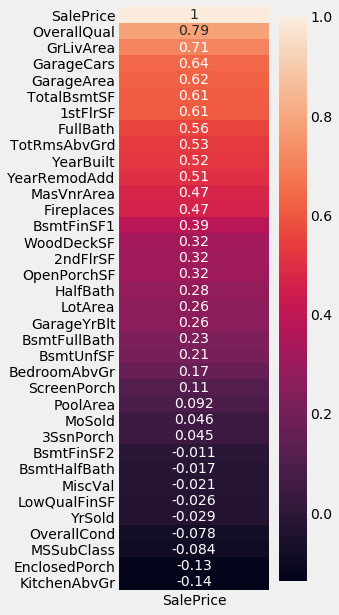

In [ ]:
corr_price = train_clean.corr()[['SalePrice']].sort_values('SalePrice',ascending=False)
# Visualisation 0.25 de corrélatio
#cols_corr = corr_price[corr_price >= 0.25].index
#df_train_corr = df_train[cols_corr]
plt.figure(figsize=(3,10))
sns.heatmap(corr_price,annot=True)

On garde les variables quantitatives corrélées à plus de 25%

In [ ]:
cols_features = corr_price[corr_price < 0.25].index
train_clean = train_clean[cols_features]

ValueError: Must pass DataFrame with boolean values only

## Création de features

## Transformations de valeurs

## Gestion des outliers

## Modèle d'apprentissage
- Définir un seuil final pour le test_size
- On a temporairement retiré *GarageYrBlt* et *MasVnrArea* dû aux valeurs manquantes non traitées

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
Y = train_clean['SalePrice']
X = train_clean.drop(['SalePrice'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.predict(X_test)
lm.score(X_test,y_test)

0.8211463190733841